# goes-orthorectify

Orthorectify and clip a GOES ABI image using the mapping created by goes-make-orth-map

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import os

#import warnings
#warnings.filterwarnings('ignore')

#### Open a GOES-16 image

In [12]:
#image_path = r'\\j-lundquist-3.ce.washington.edu\storage\GOES\goes16\2017\03\1\ABI-L1b-RadC\00\C14\OR_ABI-L1b-RadC-M3C14_G16_s20170600002497_e20170600005270_c20170600005307.nc'
image_path = r'\\j-lundquist-3.ce.washington.edu\storage\GOES\goes16\2019\04\16\ABI-L1b-RadC\18\C02\OR_ABI-L1b-RadC-M6C02_G16_s20191061801182_e20191061803555_c20191061803598.nc'

In [13]:
image = xr.open_dataset(image_path)
image.x

<xarray.DataArray 'x' (x: 10000)>
array([-0.101353, -0.101339, -0.101325, ...,  0.038605,  0.038619,  0.038633],
      dtype=float32)
Coordinates:
    t        datetime64[ns] ...
  * x        (x) float32 -0.101353 -0.101339 ... 0.038619004 0.03863301
    y_image  float32 ...
    x_image  float32 ...
Attributes:
    units:          rad
    axis:           X
    long_name:      GOES fixed grid projection x-coordinate
    standard_name:  projection_x_coordinate

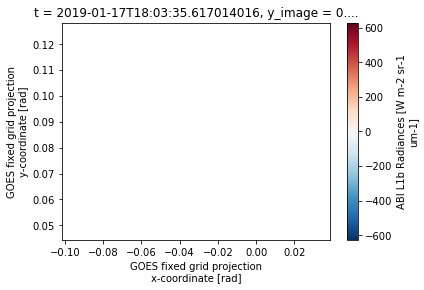

In [7]:
image.Rad.plot()

#### Open the ortho mapping:

In [8]:
tuol_test = xr.open_dataset('test_map_tuol.nc')
print(tuol_test)

<xarray.Dataset>
Dimensions:              (x: 1995, y: 1501)
Coordinates:
    longitude            (x) float64 ...
    latitude             (y) float64 ...
    dem_px_angle_x       (y, x) float64 ...
    dem_px_angle_y       (y, x) float64 ...
Dimensions without coordinates: x, y
Data variables:
    abi_500m_px_angle_x  (y, x) float64 ...
    abi_500m_px_angle_y  (y, x) float64 ...
    abi_1km_px_angle_x   (y, x) float64 ...
    abi_1km_px_angle_y   (y, x) float64 ...
    abi_2km_px_angle_x   (y, x) float64 ...
    abi_2km_px_angle_y   (y, x) float64 ...
    elevation            (y, x) float64 ...
Attributes:
    longitude_of_projection_origin:                 -89.5
    semi_major_axis:                                6378137
    semi_minor_axis:                                6356752.31414
    perspective_point_height+semi_major_axis:       42164160
    grs80_eccentricity:                             0.0818191910435
    longitude_of_projection_origin_info:            longitude of geost

#### Map and clip the image to the pixel map

C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\pandas\core\indexes\base.py:2825: RuntimeWarning: invalid value encountered in less
  indexer = np.where(op(left_distances, right_distances) |
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\pandas\core\indexes\base.py:2825: RuntimeWarning: invalid value encountered in less_equal
  indexer = np.where(op(left_distances, right_distances) |


(1501, 1995)


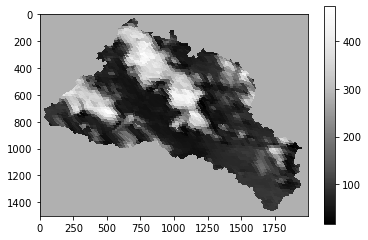

In [14]:
# this finds the nearest x and y in the GOES ABI image for each DEM grid cell and returns the Rad values
# in the same shape and size as the original DEM
s = image.sel(x=tuol_test.dem_px_angle_x, y=tuol_test.dem_px_angle_y, method='nearest').Rad.values
print(s.shape)
plt.imshow(s, cmap='Greys_r')
plt.colorbar()

***

## Orthorectify a time series of GOES images

In [19]:
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    # https://thispointer.com/python-how-to-get-list-of-files-in-directory-and-sub-directories/
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles 

In [75]:
#  all the observations from a directory path
path = r'\\j-lundquist-3.ce.washington.edu\storage\GOES\21\ABI-L1b-RadC\12\C02'
print('Load all observations from the directory provided')
file_list = []
try:
    file_list.append(getListOfFiles(path))
except FileNotFoundError:
    print('Could not find files at {}'.format(path))

Load all observations from the directory provided


In [76]:
file_list = file_list[0]

In [77]:
# For each file, orthorectify and output a GeoTiff
print('For each file, orthorectify and output a GeoTiff')

for filename in file_list:
    with xr.open_dataset(filename) as f:
        # this finds the nearest x and y in the GOES ABI image for each DEM grid cell and returns the Rad values
        # in the same shape and size as the original DEM
        s = f.sel(x=tuol_test.dem_px_angle_x, y=tuol_test.dem_px_angle_y, method='nearest').Rad.values
        print(s.shape)
        plt.imshow(s, cmap='Greys_r')
        plt.colorbar()
        plt.title(filename)
        plt.tight_layout()
        plt.savefig(filename+'.jpg')
        plt.close()

For each file, orthorectify and output a GeoTiff


C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\pandas\core\indexes\base.py:2825: RuntimeWarning: invalid value encountered in less
  indexer = np.where(op(left_distances, right_distances) |
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\pandas\core\indexes\base.py:2825: RuntimeWarning: invalid value encountered in less_equal
  indexer = np.where(op(left_distances, right_distances) |


(1501, 1995)


C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  del sys.path[0]
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\pandas\core\indexes\base.py:2825: RuntimeWarning: invalid value encountered in less
  indexer = np.where(op(left_distances, right_distances) |
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\pandas\core\indexes\base.py:2825: RuntimeWarning: invalid value encountered in less_equal
  indexer = np.where(op(left_distances, right_distances) |


(1501, 1995)


C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  del sys.path[0]
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\pandas\core\indexes\base.py:2825: RuntimeWarning: invalid value encountered in less
  indexer = np.where(op(left_distances, right_distances) |
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\pandas\core\indexes\base.py:2825: RuntimeWarning: invalid value encountered in less_equal
  indexer = np.where(op(left_distances, right_distances) |


(1501, 1995)


C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  del sys.path[0]
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\pandas\core\indexes\base.py:2825: RuntimeWarning: invalid value encountered in less
  indexer = np.where(op(left_distances, right_distances) |
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\pandas\core\indexes\base.py:2825: RuntimeWarning: invalid value encountered in less_equal
  indexer = np.where(op(left_distances, right_distances) |


(1501, 1995)


C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  del sys.path[0]
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\pandas\core\indexes\base.py:2825: RuntimeWarning: invalid value encountered in less
  indexer = np.where(op(left_distances, right_distances) |
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\pandas\core\indexes\base.py:2825: RuntimeWarning: invalid value encountered in less_equal
  indexer = np.where(op(left_distances, right_distances) |


(1501, 1995)


C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  del sys.path[0]
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\pandas\core\indexes\base.py:2825: RuntimeWarning: invalid value encountered in less
  indexer = np.where(op(left_distances, right_distances) |
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\pandas\core\indexes\base.py:2825: RuntimeWarning: invalid value encountered in less_equal
  indexer = np.where(op(left_distances, right_distances) |


(1501, 1995)


C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  del sys.path[0]
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\pandas\core\indexes\base.py:2825: RuntimeWarning: invalid value encountered in less
  indexer = np.where(op(left_distances, right_distances) |
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\pandas\core\indexes\base.py:2825: RuntimeWarning: invalid value encountered in less_equal
  indexer = np.where(op(left_distances, right_distances) |


(1501, 1995)


C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  del sys.path[0]
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\pandas\core\indexes\base.py:2825: RuntimeWarning: invalid value encountered in less
  indexer = np.where(op(left_distances, right_distances) |
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\pandas\core\indexes\base.py:2825: RuntimeWarning: invalid value encountered in less_equal
  indexer = np.where(op(left_distances, right_distances) |


(1501, 1995)


C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  del sys.path[0]
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\pandas\core\indexes\base.py:2825: RuntimeWarning: invalid value encountered in less
  indexer = np.where(op(left_distances, right_distances) |
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\pandas\core\indexes\base.py:2825: RuntimeWarning: invalid value encountered in less_equal
  indexer = np.where(op(left_distances, right_distances) |


(1501, 1995)


C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  del sys.path[0]
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\pandas\core\indexes\base.py:2825: RuntimeWarning: invalid value encountered in less
  indexer = np.where(op(left_distances, right_distances) |
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\pandas\core\indexes\base.py:2825: RuntimeWarning: invalid value encountered in less_equal
  indexer = np.where(op(left_distances, right_distances) |


(1501, 1995)


C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  del sys.path[0]
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\pandas\core\indexes\base.py:2825: RuntimeWarning: invalid value encountered in less
  indexer = np.where(op(left_distances, right_distances) |
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\pandas\core\indexes\base.py:2825: RuntimeWarning: invalid value encountered in less_equal
  indexer = np.where(op(left_distances, right_distances) |


(1501, 1995)


C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  del sys.path[0]
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\pandas\core\indexes\base.py:2825: RuntimeWarning: invalid value encountered in less
  indexer = np.where(op(left_distances, right_distances) |
C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\pandas\core\indexes\base.py:2825: RuntimeWarning: invalid value encountered in less_equal
  indexer = np.where(op(left_distances, right_distances) |


(1501, 1995)


C:\Users\steve\Anaconda3\envs\rasterenv\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  del sys.path[0]


In [ ]:
# open this entire dataset as a "multi-file dataset"
# For each file, orthorectify and output a GeoTiff
print('Open as multi-file dataset')
print('For each file, orthorectify and output a GeoTiff')

with xr.open_mfdataset(file_list[0], concat_dim=['t']) as g:
    # this finds the nearest x and y in the GOES ABI image for each DEM grid cell and returns the Rad values
    # in the same shape and size as the original DEM
    s = g.sel(x=tuol_test.dem_px_angle_x, y=tuol_test.dem_px_angle_y, method='nearest').Rad.values
    print(s.shape)
    #plt.imshow(s, cmap='Greys_r')
    #plt.colorbar()
    #plt.title(filename)
    #plt.tight_layout()
    #plt.savefig(filename+'.jpg')
    #plt.close()